Sample Rate: 44100
Data Shape: (2219424, 2)


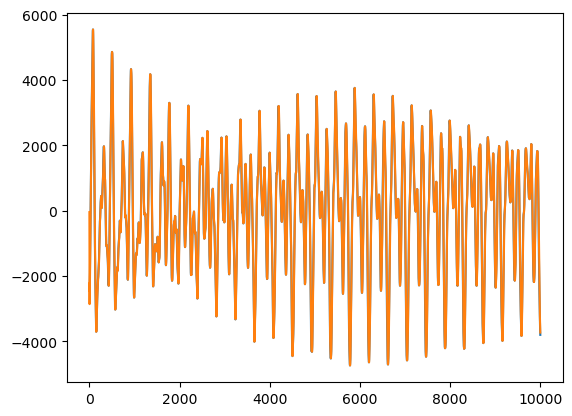

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from sklearn.decomposition import PCA
from scipy.signal import butter, lfilter


# Read the WAV file
sample_rate, data = wavfile.read("data/yvette.wav")
mus_start = 60000
data = data[mus_start:]
l, r = data[:,0], data[:,1]

print(f"Sample Rate: {sample_rate}")
print(f"Data Shape: {data.shape}")  # This will show (num_samples,) for mono, (num_samples, num_channels) for stereo

def butter_lowpass_filter(data, cutoff, fs, order=6):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return lfilter(b, a, data)

cutoff_freq = 10000  # Adjust based on noise frequency
filtered_audio = butter_lowpass_filter(l, cutoff_freq, sample_rate)

ix_cut = 10000
plt.plot(l[:ix_cut])
plt.plot(filtered_audio[:ix_cut])
plt.show()


# algorithm approach

- sliding window over delay embedding matrix (kind of like SSA)

In [33]:
1000**2

1000000

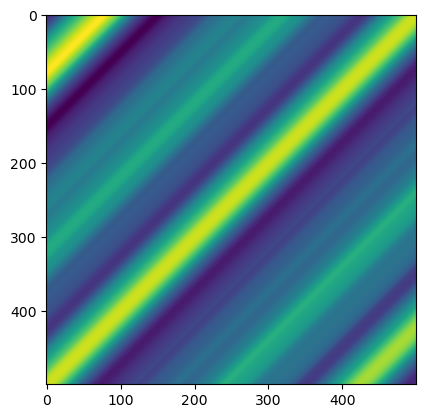

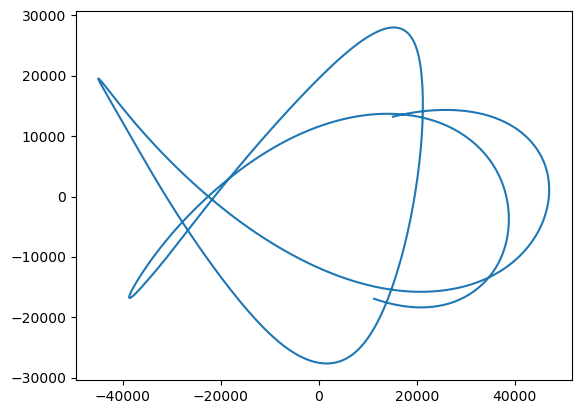

In [51]:
wh = 500
window = np.zeros((wh, wh))

for t in range(50):
    sample = l[:wh*2]
    for i in range(wh):
        window[i, :] = sample[i:i+wh]

    plt.imshow(window)
    plt.show()

    pca = PCA()
    window_pca = pca.fit_transform(window)

    plt.plot(window_pca[:, 0], window_pca[:, 2])
    plt.show()

# testing custom pca

In [17]:
import numpy as np
import standalonePca
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.pyplot as plt

In [19]:
pca_sk = PCA()

data = np.random.randn(100, 5).astype(np.float32)

pca_out_control = pca_sk.fit_transform(data)
pca_out_test = standalonePca.fit_transform(data)

assert np.testing.assert_array_almost_equal(pca_out_control, pca_out_test)


AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 500 / 500 (100%)
Max absolute difference among violations: 4.2269096
Max relative difference among violations: 108.88014
 ACTUAL: array([[-2.749148e+00, -1.204183e+00, -1.768100e-01, -3.150682e-01,
        -6.684589e-02],
       [ 1.078226e+00,  4.527830e-01, -3.811622e-01,  1.131819e+00,...
 DESIRED: array([[ 1.477761, -1.346927, -0.631773, -2.676544,  0.296945],
       [ 0.339758,  0.386271, -0.257369,  0.130839,  0.562376],
       [ 0.500217, -0.740479, -0.545502, -1.195653, -0.123832],...

In [11]:
pca_out_test.T

array([[ 1.45481145e+00,  6.92296386e-01, -7.56088138e-01,
         1.06619513e+00,  1.24360669e+00,  1.88930106e+00,
        -2.22769189e+00, -7.64995962e-02, -1.13487279e+00,
        -1.45592868e+00, -1.64598680e+00, -2.66104460e-01,
         5.15863061e-01,  6.71836019e-01, -2.39394486e-01,
         9.91833806e-01,  5.69241464e-01,  4.06950533e-01,
         2.64069885e-01, -2.25573570e-01,  4.37247962e-01,
        -1.49151459e-02,  1.53946662e+00,  2.48296404e+00,
        -9.05246139e-01,  1.31491506e+00, -5.17760180e-02,
         5.83361499e-02,  2.39607477e+00,  4.16166574e-01,
         3.55647951e-01, -1.86638808e+00,  3.07717741e-01,
        -7.94320345e-01, -1.63015795e+00,  1.04722929e+00,
        -1.67103529e-01,  1.06707668e+00,  1.42938948e+00,
         1.66574478e+00, -6.60763502e-01, -1.03084385e+00,
         4.97820318e-01,  1.29730821e+00,  5.41491946e-03,
        -1.22032613e-01,  1.01043069e+00, -9.98294115e-01,
         3.30973089e-01, -2.90194631e-01, -1.84281445e+0